In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/c/Users/Admin/Desktop/Python_DA/Test


In [3]:
!ls /c/Users/Admin/Desktop/Python_DA/Data/Pratice/

amazon.csv
data.csv
netflix_titles.csv
supermarket_sales.csv


In [4]:
# Importing data
df = pd.read_csv("../Data/Pratice/supermarket_sales.csv")
df.rename(columns = {"cogs":"COGS"}, inplace = True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Check null value

In [5]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
COGS                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
COGS                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.groupby("Gender")["Product line"].size()

Gender
Female    501
Male      499
Name: Product line, dtype: int64

### Sort by Gender 

In [8]:
sortdf = df.groupby("Gender")["Product line"].value_counts(sort = False)
sortdf

Gender  Product line          
Female  Electronic accessories    84
        Fashion accessories       96
        Food and beverages        90
        Health and beauty         64
        Home and lifestyle        79
        Sports and travel         88
Male    Electronic accessories    86
        Fashion accessories       82
        Food and beverages        84
        Health and beauty         88
        Home and lifestyle        81
        Sports and travel         78
Name: Product line, dtype: int64

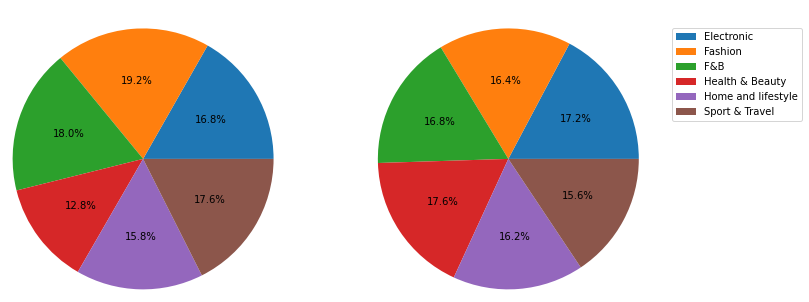

In [9]:
#Plotting
labels = ["Electronic","Fashion","F&B","Health & Beauty","Home and lifestyle","Sport & Travel"]
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.pie(sortdf.iloc[0:6], labels = None, radius = 1.2,autopct ='%1.1f%%' )    
ax1.set_title("Female", fontweight = "bold", color = "w")

ax2.pie(sortdf.iloc[6:], labels = None, radius = 1.2,autopct ='%1.1f%%' )
ax2.set_title("Male", fontweight = "bold", color = "w")

plt.legend(labels = labels, bbox_to_anchor=(1.6, 1))
plt.show()

=> Through this chart, we can see that the ladies usually buy FASHION and F&B products (19.2% and 18%).

=> For gentlemen, they often go to the supermarket to buy ELECTRONIC and HEALTH products. In addition, the demand of Men is more balance than Woman.

In [10]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

#### Ở đây sự chênh lệch về Member và khách vãng lai là không nhiều nên ta không phân tích sâu hơn ở khía cạnh này

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
df["Date"] + " " + df["Time"]

0       1/5/2019 13:08
1       3/8/2019 10:29
2       3/3/2019 13:23
3      1/27/2019 20:33
4       2/8/2019 10:37
            ...       
995    1/29/2019 13:46
996     3/2/2019 17:16
997     2/9/2019 13:22
998    2/22/2019 15:33
999    2/18/2019 13:28
Length: 1000, dtype: object

In [13]:
df["Date"] = pd.to_datetime(df["Date"]+ " " + df["Time"])

In [14]:
df = df.drop(columns = "Time").copy()

In [15]:
df.rename(columns = {"Date":"Datetime"}, inplace = True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Datetime,Payment,COGS,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Buytime per City

* In this case i rounded the Hour when the customer go to the supermarket

In [16]:
df["Datetime"].dt.hour.value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: Datetime, dtype: int64

In [17]:
buytime = df["Datetime"].dt.hour.value_counts().reset_index().sort_values("index")
buytime

,index,Datetime
3,10,101
5,11,90
6,12,89
1,13,103
7,14,83
2,15,102
8,16,77
10,17,74
4,18,93
0,19,113


In [18]:
branch = df[["Branch","Datetime","City"]]
branch.head()

,Branch,Datetime,City
0,A,2019-01-05 13:08:00,Yangon
1,C,2019-03-08 10:29:00,Naypyitaw
2,A,2019-03-03 13:23:00,Yangon
3,A,2019-01-27 20:33:00,Yangon
4,A,2019-02-08 10:37:00,Yangon


In [19]:
# Checking and Dig in some information
print(branch.shape[0])
branch["Datetime"].dt.hour.count

1000


<bound method Series.count of 0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Datetime, Length: 1000, dtype: int64>

In [20]:
branch = branch.assign(Hour = branch["Datetime"].dt.hour.values).copy()
branch.drop(columns="Datetime", inplace = True)
branch.head()

,Branch,City,Hour
0,A,Yangon,13
1,C,Naypyitaw,10
2,A,Yangon,13
3,A,Yangon,20
4,A,Yangon,10


In [21]:
branch.groupby(["Branch","Hour"])["City"].count().reset_index()

,Branch,Hour,City
0,A,10,38
1,A,11,35
2,A,12,33
3,A,13,31
4,A,14,25
5,A,15,37
6,A,16,32
7,A,17,27
8,A,18,33
9,A,19,27


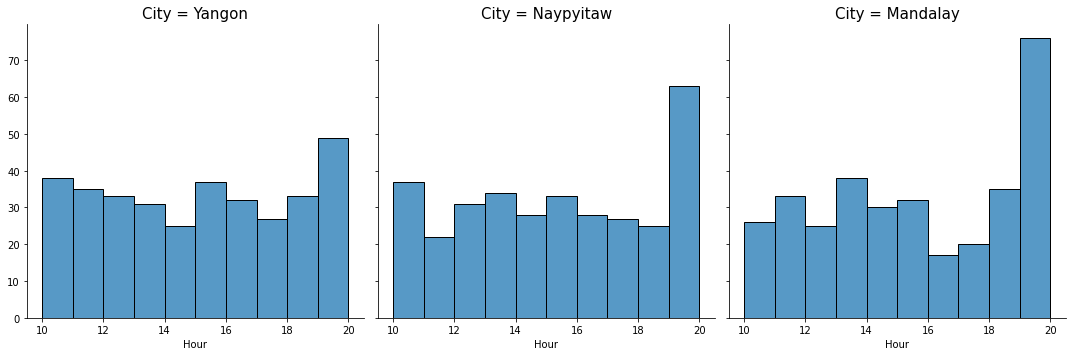

In [22]:
g = sns.FacetGrid(branch, col = "City", height = 5 )
g.map(sns.histplot, "Hour" )
g.set_titles(size = 15)
plt.show()

#### Through this chart, we can draw these following ideas below:
- The customer usually shopping from 18-20 o'clock.
- For Yangon city, the branch need to review their operation and services, because the customer at this branch is much less than 2 other branchs, specially from 18-20 o'clock.
- For Mandalay City, they have to improve more customer at 16-18 o'clock because the average visitors is quite low.

### Product per City

In [23]:
product = df.groupby(["City","Product line"])["Branch"].count().reset_index().copy()
product 

,City,Product line,Branch
0,Mandalay,Electronic accessories,55
1,Mandalay,Fashion accessories,62
2,Mandalay,Food and beverages,50
3,Mandalay,Health and beauty,53
4,Mandalay,Home and lifestyle,50
5,Mandalay,Sports and travel,62
6,Naypyitaw,Electronic accessories,55
7,Naypyitaw,Fashion accessories,65
8,Naypyitaw,Food and beverages,66
9,Naypyitaw,Health and beauty,52


In [34]:
product["Product line"].unique()

array(['Electronic accessories', 'Fashion accessories',
       'Food and beverages', 'Health and beauty', 'Home and lifestyle',
       'Sports and travel'], dtype=object)

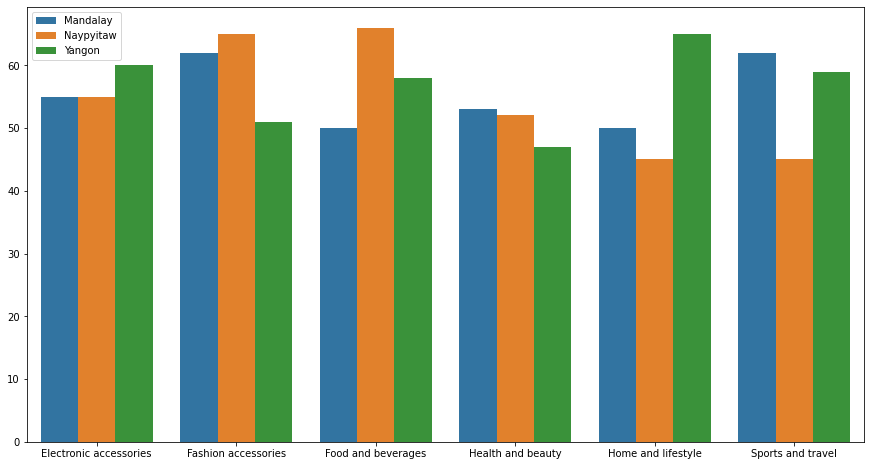

In [45]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(
    x = "Product line",
    y = "Branch",
    hue = "City",
    data = product,
    ax = ax
)

ax.set_xticklabels(product["Product line"].unique(),fontsize = '10')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.legend()
plt.show()